## Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Для расчета коэффициента линейной регрессии без intercept с использованием градиентного спуска нам нужно минимизировать функцию ошибки MSE:

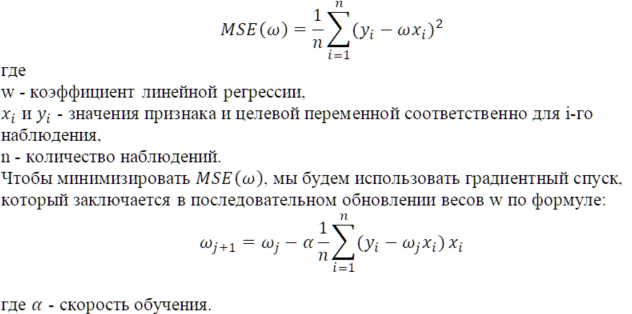

Напишем функцию, которая будет реализовывать градиентный спуск:

In [2]:
import numpy as np
# заданные значения зарплаты и кредитного скоринга
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
def gradient_descent(x, y, alpha=0.0001, iterations=1000):
    w = 0  # начальное значение веса
    n = len(x)  # количество наблюдений

    for i in range(iterations):
        y_pred = w * x  # предсказанные значения
        error = y - y_pred  # ошибка
        w += alpha * (1 / n) * np.sum(error * x)  # обновление веса

    return w


Теперь мы можем посчитать коэффициент линейной регрессии без intercept с помощью функции gradient_descent:

In [4]:
b_without_intercept = gradient_descent(zp, ks)

print("Коэффициент линейной регрессии без intercept:", b_without_intercept)


Коэффициент линейной регрессии без intercept: 5.889820420132689


Визуализируем результаты линейной регрессии без intercept:

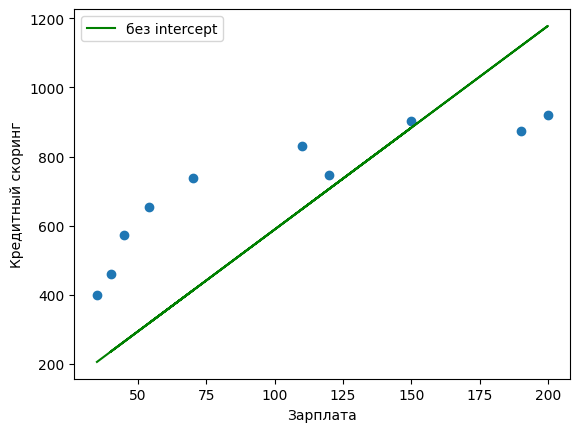

In [5]:
import matplotlib.pyplot as plt
# график рассеяния
plt.scatter(zp, ks)

# прямая без intercept
plt.plot(zp, b_without_intercept * zp, color='green', label='без intercept')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()


## Задача 3

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Как видно из графика задачи №2, между заработной платой и скоринговым баллом есть некоторая линейная зависимость. Мы можем использовать линейную регрессию для построения линии, которая наилучшим образом приближает эти данные.  

Используем метод наименьших квадратов для определения коэффициентов линейной регрессии. Формулы для вычисления коэффициентов линейной регрессии следующие:

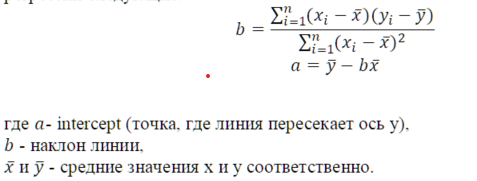

In [6]:
x_mean = np.mean(zp)
y_mean = np.mean(ks)
b = np.sum((zp - x_mean) * (ks - y_mean)) / np.sum((zp - x_mean) ** 2)
a = y_mean - b * x_mean
print("Коэффициенты линейной регрессии: a = {:.2f}, b = {:.2f}".format(a, b))

Коэффициенты линейной регрессии: a = 444.18, b = 2.62


Таким образом, уравнение линейной регрессии имеет вид:  
y=2.62x+444.18  

    Теперь мы можем построить линию регрессии на графике:  


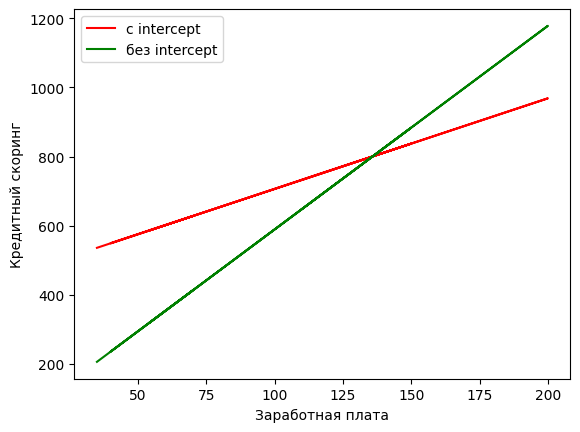

In [7]:
# прямая с intercept
plt.plot(zp, b * zp + a, color='red', label='c intercept')

# прямая без intercept
plt.plot(zp, b_without_intercept * zp, color='green', label='без intercept')

plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()